In [24]:
import tensorflow as tf      # Deep Learning library
import numpy as np           # Handle matrices
import retro                 # Retro Environment
from retro.retro_env import RetroEnv

from skimage import transform # Help us to preprocess the frames
from skimage.color import rgb2gray # Help us to gray our frames

import matplotlib.pyplot as plt # Display graphs
%matplotlib inline
from IPython import display

from collections import deque # Ordered collection with ends

import random

import warnings # This ignore all the warning messages that are normally printed during the training because of skiimage
warnings.filterwarnings('ignore') 

import os
import gym

In [25]:
class SF2Env(RetroEnv):
    KEY_LIST = ["B", "A", "MODE", "START", "UP", "DOWN", "LEFT", "RIGHT", "C", "Y", "X", "Z"]
    
    def __init__(self, game, state=retro.State.DEFAULT, scenario=None, info=None, use_restricted_actions=retro.Actions.FILTERED,
                 record=False, players=1, inttype=retro.data.Integrations.STABLE, obs_type=retro.Observations.IMAGE):
        # action 입력은 DISCRETE 모드
        use_restricted_actions = retro.Actions.DISCRETE
        
        RetroEnv.__init__(self, game, state, scenario, info, use_restricted_actions,
                 record, players, inttype, obs_type)
        # retro의 버그 : scenario.json의 actions를 인식하지 못하기 때문에 수동으로 세팅
        self.button_combos = self.data.valid_actions()
        if self.use_restricted_actions == retro.Actions.DISCRETE:
            combos = 1
            for combo in self.button_combos:
                combos *= len(combo)
            self.action_space = gym.spaces.Discrete(combos ** players)
        elif self.use_restricted_actions == retro.Actions.MULTI_DISCRETE:
            self.action_space = gym.spaces.MultiDiscrete([len(combos) if self.gym_version >= (0, 9, 6) else (0, len(combos) - 1) for combos in self.button_combos] * players)
        else:
            self.action_space = gym.spaces.MultiBinary(self.num_buttons * players)
    
    def step(self, a):
        ob, rew, done, info = RetroEnv.step(self, a)
        print(self.action_array_to_keys(self.action_to_array(a)))
        return ob, rew, done, info
    
        
            
    def action_array_to_keys(self, action_array):
        press_keys = []
        for i,v in enumerate(action_array[0]):
            if v == 1:
                press_keys.append(self.KEY_LIST[i])
        return press_keys

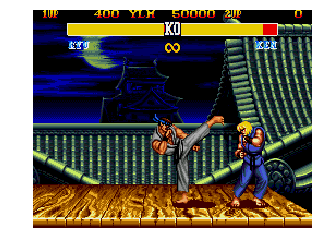

0.0

{'distance_y_between_players': 0,
 'second_player_matches_won': 130816,
 'first_player_attack_x': 386,
 'continuetimer': 0,
 'is_first_player_jangpoong_y': 0,
 'second_player_y': 192,
 'distance_x_between_players': 26,
 'second_player_health': 149,
 'first_player_matches_won': 0,
 'first_player_score': 400,
 'first_player_health': 176,
 'second_player_x': 422,
 'second_player_attack_x': 425,
 'first_player_y': 192,
 'is_second_player_jangpoong_x': 0,
 'is_first_player_jangpoong_x': 0,
 'second_player_score': 0,
 'is_second_player_jangpoong_y': 0,
 'is_first_player_jangpoong': 0,
 'first_player_x': 373,
 'is_second_player_jangpoong': 0}

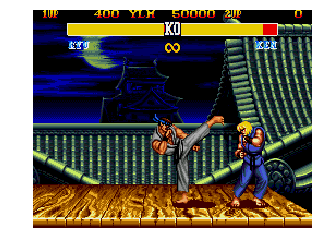

In [9]:
rom_path = os.path.dirname(os.path.abspath('.')) + '/sf2-env/StreetFighterIISpecialChampionEdition-Genesis'

env = SF2Env(rom_path, 
             state='near.state', 
             scenario='scenario')

ob = env.reset()

possible_actions = np.array(list(range(1, env.action_space.n+1)))


plt.figure(0)
plt.clf()

ob, rew, done, info = None, None, None, None

for i in range(120):
    
    if i % 2 == 1:
        ob, rew, done, info = env.step(9)
    else:
        ob, rew, done, info = env.step(0)
    plt.imshow(env.render(mode='rgb_array'))
    plt.axis('off')
    
    display.clear_output(wait=True)
    display.display(plt.gcf())
    display.display(rew)
    display.display(info)

env.close()

In [ ]:
rom_path = os.path.dirname(os.path.abspath('.')) + '/sf2-env/StreetFighterIISpecialChampionEdition-Genesis'
env = SF2Env(rom_path, 
                 'near.state', 
                 scenario='scenario',
                 players=1,
                 use_restricted_actions=retro.Actions.DISCRETE)

# retro의 버그 : scenario.json의 actions를 인식하지 못하기 때문에 수동으로 세팅
'''
env.button_combos = env.data.valid_actions()
if env.use_restricted_actions == retro.Actions.DISCRETE:
    combos = 1
    for combo in env.button_combos:
        combos *= len(combo)
    env.action_space = gym.spaces.Discrete(combos ** env.players)
elif env.use_restricted_actions == retro.Actions.MULTI_DISCRETE:
    env.action_space = gym.spaces.MultiDiscrete([len(combos) if env.gym_version >= (0, 9, 6) else (0, len(combos) - 1) for combos in env.button_combos] * env.players)
else:
    env.action_space = gym.spaces.MultiBinary(env.num_buttons * env.players)
'''


In [ ]:

#key_press_list = env.action_to_array(18)
KEY_LIST = ["B", "A", "MODE", "START", "UP", "DOWN", "LEFT", "RIGHT", "C", "Y", "X", "Z"]


def action_array_to_keys(action_array):
    press_keys = []
    for i,v in enumerate(action_array[0]):
        if v == 1:
            press_keys.append(KEY_LIST[i])
    return press_keys
        

env.action_array_to_keys(env.action_to_array(5))
        








In [ ]:
a = 18
action = 0

ACTIONS = [[[], ["UP"], ["DOWN"]],
      [[], ["LEFT"], ["RIGHT"]],
      [[], ["A"], ["B"], ["C"], ["X"], ["Y"], ["Z"]]]
    
actions = []

for combo in env.button_combos:
    current = a % len(combo)
    a //= len(combo)
    action |= combo[current]
    print(action)
    ap = np.zeros([env.num_buttons], np.uint8)
    for i in range(env.num_buttons):
        ap[i] = (action >> i) & 1
    print(ap)
    
actions.append(ap)
    
print(actions)
print(env.action_to_array(18))

In [ ]:
env.num_buttons * p:env.num_buttons * (p + 1)

In [ ]:
env.num_buttons

In [ ]:
env.button_combos

In [ ]:
env.data.valid_actions()

In [ ]:
import tensorflow as tf      # Deep Learning library
import numpy as np           # Handle matrices
import retro                 # Retro Environment


from skimage import transform # Help us to preprocess the frames
from skimage.color import rgb2gray # Help us to gray our frames

import matplotlib.pyplot as plt # Display graphs
%matplotlib inline
from IPython import display

from collections import deque # Ordered collection with ends

import random

import warnings # This ignore all the warning messages that are normally printed during the training because of skiimage
warnings.filterwarnings('ignore') 

import os
import gym


rom_path = os.path.dirname(os.path.abspath('.')) + '/sf2-env/StreetFighterIISpecialChampionEdition-Genesis'
env = retro.make(rom_path, 
                 'near.state', 
                 scenario='scenario',
                 players=1,
                 use_restricted_actions=retro.Actions.DISCRETE)

# retro의 버그 : scenario.json의 actions를 인식하지 못하기 때문에 수동으로 세팅
env.button_combos = env.data.valid_actions()
if env.use_restricted_actions == retro.Actions.DISCRETE:
    combos = 1
    for combo in env.button_combos:
        combos *= len(combo)
    env.action_space = gym.spaces.Discrete(combos ** env.players)
elif env.use_restricted_actions == retro.Actions.MULTI_DISCRETE:
    env.action_space = gym.spaces.MultiDiscrete([len(combos) if env.gym_version >= (0, 9, 6) else (0, len(combos) - 1) for combos in env.button_combos] * env.players)
else:
    env.action_space = gym.spaces.MultiBinary(env.num_buttons * env.players)

print(env.data.valid_actions())
print(env.button_combos)
print(env.action_space)
env.close()


In [ ]:
env.close()

In [ ]:
env.action_to_array(111)

In [ ]:
env.button_combos

In [ ]:
2 | 4

In [20]:
for i in range(10):
    print(random.randint(1,2))

1
2
2
1
2
1
2
2
1
2
